In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

Project Instructions
Analyze Nobel Prize winner data and identify patterns by answering the following questions:

What is the most commonly awarded gender and birth country?

Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

Which decade and Nobel Prize category combination had the highest proportion of female laureates?

Who was the first woman to receive a Nobel Prize, and in what category?

Which individuals or organizations have won more than one Nobel Prize throughout the years?
Store the full names in a list named repeat_list.

In [3]:
nobel = pd.read_csv('nobel.csv')
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


What is the most commonly awarded gender and birth country?

In [4]:
#FINDING THE MOST COMMONLY AWARDED GENDER

nobel_gender = nobel['sex'].value_counts()
nobel_gender

top_gender = nobel_gender.index[0]
top_gender

'Male'

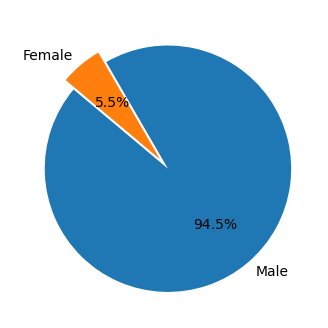

In [5]:
plt.figure(figsize=(4,4))
plt.pie(nobel_gender.values, labels=nobel_gender.index, autopct='%1.1f%%', startangle=140, explode=[0.05]*len(nobel_gender))
plt.show()


In [6]:
#FINDING THE MOST COMMONLY AWARDED BIRTH COUNTRY

nobel_country = nobel['birth_country'].value_counts()
nobel_country.reset_index()


top_country = nobel_country.index[0]
top_country

'United States of America'

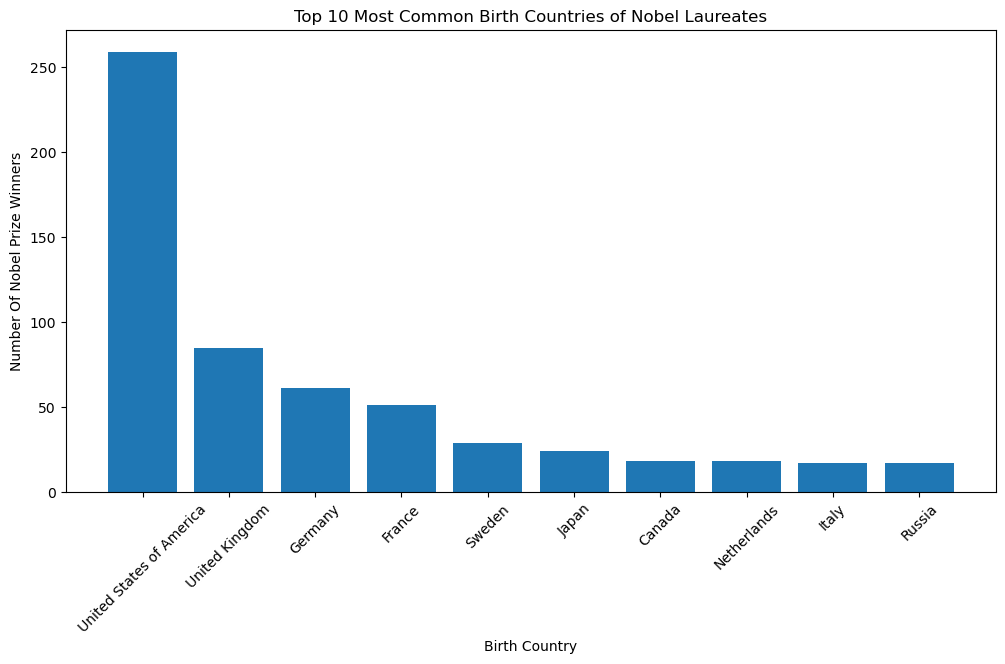

In [7]:
# Prepare the data
nobel_country = nobel['birth_country'].value_counts().reset_index()
nobel_country.columns = ['birth_country', 'count']

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

top_10 = nobel_country.head(10)
ax.bar(top_10['birth_country'], top_10['count'])
ax.set_xlabel('Birth Country')
ax.set_ylabel('Number Of Nobel Prize Winners')
ax.set_title('Top 10 Most Common Birth Countries of Nobel Laureates')
ax.set_xticklabels(top_10['birth_country'], rotation=45)


plt.show()

Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
(Store your answers as string variables top_gender and top_country.)

In [8]:
#Create the US-born winners column
nobel['us_winners'] = nobel['birth_country'] == 'United States of America'

#Create the decade column
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)

#Finding the ratio
us_winners_mean = nobel.groupby('decade', as_index=False)['us_winners'].mean()


#Identify the decade with the highest ratio of US-born winners
top_decade = us_winners_mean[us_winners_mean['us_winners'] == us_winners_mean['us_winners'].max()]['decade'].values[0]
top_decade


2000

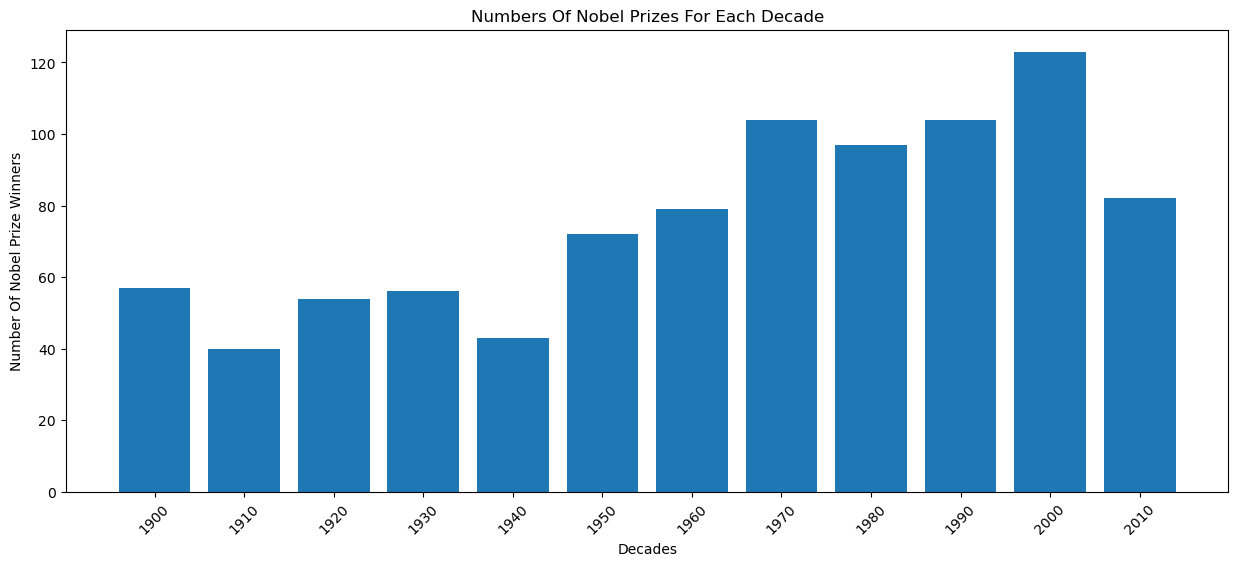

In [56]:
# Prepare the data
decade_counts = nobel['decade'].value_counts().reset_index()
decade_counts.columns = ['decade', 'count']
decade_counts = decade_counts.sort_values('decade')

# Prepare the data

# Create figure and axes
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(decade_counts['decade'], decade_counts['count'], width=8)
ax.set_xlabel('Decades')
ax.set_ylabel('Number Of Nobel Prize Winners')
ax.set_title('Numbers Of Nobel Prizes For Each Decade')
ax.set_xticks(decade_counts['decade']) 
ax.set_xticklabels(decade_counts['decade'], rotation=45)



plt.show()

Which decade and Nobel Prize category combination had the highest proportion of female laureates?

In [71]:
nobel['female_winner'] = nobel['sex']=='Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
prop_female_winners.sort_values(by = 'female_winner', ascending=False).head(25)


,decade,category,female_winner
64,2010,Peace,0.400000
50,1990,Literature,0.300000
56,2000,Literature,0.300000
62,2010,Literature,0.285714
40,1970,Peace,0.230769
11,1920,Literature,0.200000
52,1990,Peace,0.176471
21,1940,Literature,0.166667
57,2000,Medicine,0.153846
23,1940,Peace,0.142857


In [67]:
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]
max_female_decade_category

,decade,category
64,2010,Peace


How many Nobel Prizes have been awarded to women in each category, broken down by decade?

In [84]:
female_winner = nobel[nobel['sex']=='Female']
female_cat_dec = female_winner[['category', 'decade']]
female_cat_count = female_cat_dec.groupby(['decade', 'category'], as_index=False).value_counts().sort_values(by='count', ascending=True)
female_cat_count.reset_index()

,index,decade,category,count
0,0,1900,Literature,1
1,22,2000,Economics,1
2,21,2000,Chemistry,1
3,19,1990,Medicine,1
4,17,1980,Peace,1
5,13,1960,Physics,1
6,12,1960,Literature,1
7,11,1960,Chemistry,1
8,10,1940,Peace,1
9,14,1970,Medicine,1


In [90]:
pivot_data = female_cat_count.pivot(index='decade', columns='category', values='count').fillna(0)
pivot_data

category,Chemistry,Economics,Literature,Medicine,Peace,Physics
decade,,,,,,
1900,0.0,0.0,1.0,0.0,1.0,1.0
1910,1.0,0.0,0.0,0.0,0.0,0.0
1920,0.0,0.0,2.0,0.0,0.0,0.0
1930,1.0,0.0,1.0,0.0,1.0,0.0
1940,0.0,0.0,1.0,1.0,1.0,0.0
1960,1.0,0.0,1.0,0.0,0.0,1.0
1970,0.0,0.0,0.0,1.0,3.0,0.0
1980,0.0,0.0,0.0,3.0,1.0,0.0
1990,0.0,0.0,3.0,1.0,3.0,0.0


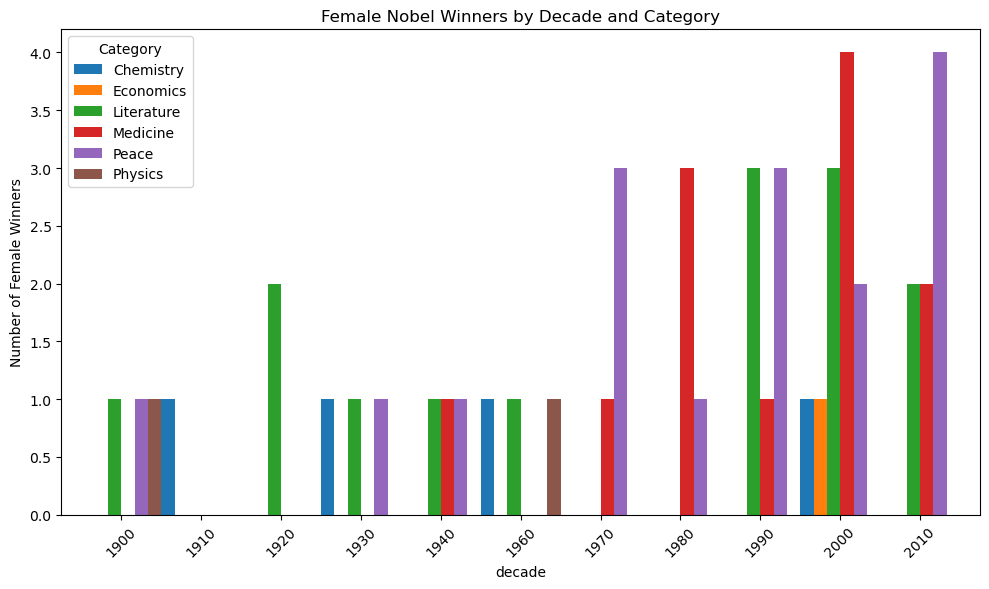

In [93]:
pivot_data.plot(kind='bar', figsize=(10, 6), width=1.0)
plt.title('Female Nobel Winners by Decade and Category')
plt.ylabel('Number of Female Winners')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()